In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Used to change filepaths
from pathlib import Path
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
from PIL import Image
%matplotlib inline
import os
import tensorflow as tf
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load Data 

In [3]:
Data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/arabic-sign-language/ArASL_Database_54K_Final')

Found 54049 files belonging to 32 classes.


2023-01-03 22:50:06.021144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 22:50:06.022110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 22:50:06.213038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 22:50:06.213893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 22:50:06.214753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [4]:
# Load the Arabic sign language datase
Data

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

# Data Exploration

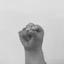

In [5]:
#displaying some images
S_data=img = tf.keras.preprocessing.image.load_img(r'/kaggle/input/arabic-sign-language/ArASL_Database_54K_Final/gaaf/GAAF (10).JPG')
S_data

In [6]:
import cv2  
cv2.imread(r'/kaggle/input/arabic-sign-language/ArASL_Database_54K_Final/gaaf/GAAF (10).JPG').shape

(64, 64, 3)

# Preprocessing 

In [7]:
# Scale Data
Data = Data.map(lambda i,j: (i/255, j))# Normallizing all the data to be unified 

# split data 

In [8]:
train_size = int(len(Data)*0.7)
test_size = int(len(Data)*0.2)
valid_size = int(len(Data)*0.1)

In [9]:
train =  Data.take(train_size)
test = Data.skip(train_size).take(test_size)
valid = Data.skip(train_size+test_size).take(valid_size)

In [10]:
from tensorflow import keras

In [11]:
input_layer = keras.layers.Input(shape=(256, 256, 3)) #Define the input layer

#Add the convolutional layers
conv_layer1 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_layer)
pool_layer1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv_layer1)
conv_layer2 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(pool_layer1)
pool_layer2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv_layer2)

#Flatten the output of the convolutional layers
flatten_layer = keras.layers.Flatten()(pool_layer2)
#Reshape the output of the flatten layer
reshape_layer = keras.layers.Reshape((1, 246016))(flatten_layer)
#Add the LSTM layer
lstm_layer = keras.layers.LSTM(units=64)(reshape_layer)
#Add the output layer
output_layer = keras.layers.Dense(units=32, activation='softmax')(lstm_layer)
#Define the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)




In [12]:
# Compile the model with an optimizer and a loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])#sparse because we are using integral encoding


In [13]:
# Interupts training when there is no progress)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) 

In [14]:
RNNSL=model.fit(train, validation_data=valid, epochs=40, callbacks=[early_stopping_cb])


2023-01-03 22:50:10.729858: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2023-01-03 22:50:14.211852: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1183/1183 [==============================] - 209s 166ms/step - loss: 2.5945 - accuracy: 0.3104 - val_loss: 1.1687 - val_accuracy: 0.7182
Epoch 2/40
1183/1183 [==============================] - 150s 126ms/step - loss: 0.7584 - accuracy: 0.8270 - val_loss: 0.5459 - val_accuracy: 0.8774
Epoch 3/40
1183/1183 [==============================] - 151s 127ms/step - loss: 0.3222 - accuracy: 0.9322 - val_loss: 0.4801 - val_accuracy: 0.8877
Epoch 4/40
1183/1183 [==============================] - 152s 128ms/step - loss: 0.1926 - accuracy: 0.9603 - val_loss: 0.3625 - val_accuracy: 0.9100
Epoch 5/40
1183/1183 [==============================] - 148s 125ms/step - loss: 0.0876 - accuracy: 0.9849 - val_loss: 0.5144 - val_accuracy: 0.8719
Epoch 6/40
1183/1183 [==============================] - 148s 125ms/step - loss: 0.0601 - accuracy: 0.9906 - val_loss: 0.3497 - val_accuracy: 0.9187
Epoch 7/40
1183/1183 [==============================] - 148s 125ms/step - loss: 0.0244 - accuracy: 0.9969 - val_loss: 0.338

In [15]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


338/338 [==============================] - 52s 42ms/step - loss: 0.3991 - accuracy: 0.9171
Test loss: 0.399135559797287
Test accuracy: 0.917067289352417


In [1]:
model.save('RnnV3_ArabicSignLang.h5')#saving the model



NameError: name 'RnnV3_ArabicSignLang' is not defined

In [ ]:
Rnn_model= load_model('RnnV3_ArabicSignLang.h5')#load model